In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("../data/bankloan.csv")
df['Experience'] = abs(df['Experience'])

### Usamos SelectKBest para poder ver cuales son las variables que más nos convienen a nuestra variable target

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

In [8]:

# Definir X como una serie (una sola columna)
X = df.drop(columns=['Personal.Loan'])

# Definir y como un DataFrame que excluye la columna 'Personal.Loan'
y = df["Personal.Loan"]

# Usamos la libreria proporciada para seleccionar las mejores variables
selecKBest = SelectKBest(score_func=f_regression, k=5) 
selecKBest.fit(X, y)

# Obtener las características seleccionadas
variables = X.columns[selecKBest.get_support()]

variables


Index(['Income', 'CCAvg', 'Education', 'Mortgage', 'CD.Account'], dtype='object')

### Ahora para poder correr varios modelos y ahorrarnos tiempo usaremos pycaret

In [9]:
from pycaret.classification import *

In [10]:
# Definir las características numéricas y categóricas
numeric_features = ['Income', 'CCAvg', 'Mortgage']
categorical_features = ['Education', 'CD.Account']

# Configurar el entorno de experimentación
s = setup(data=df[['Income', 'CCAvg', 'Education', 'Mortgage', 'CD.Account', 'Personal.Loan']], 
          target='Personal.Loan', 
          session_id=123,
          numeric_features=numeric_features,
          categorical_features=categorical_features)

,Description,Value
0,Session id,123
1,Target,Personal.Loan
2,Target type,Binary
3,Original data shape,"(5000, 6)"
4,Transformed data shape,"(5000, 8)"
5,Transformed train set shape,"(3500, 8)"
6,Transformed test set shape,"(1500, 8)"
7,Numeric features,3
8,Categorical features,2
9,Preprocess,True


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9731,0.0000,0.7887,0.9211,0.8493,0.8347,0.8380,0.0330
gbc,Gradient Boosting Classifier,0.9709,0.0000,0.7737,0.9115,0.8347,0.8189,0.8235,0.0260
lightgbm,Light Gradient Boosting Machine,0.9706,0.0000,0.7977,0.8851,0.8383,0.8222,0.8240,0.4270
et,Extra Trees Classifier,0.9694,0.0000,0.7648,0.9018,0.8269,0.8103,0.8140,0.0240
dt,Decision Tree Classifier,0.9606,0.0000,0.7708,0.8120,0.7886,0.7669,0.7686,0.0090
ada,Ada Boost Classifier,0.9586,0.0000,0.6990,0.8410,0.7607,0.7383,0.7437,0.0180
lr,Logistic Regression,0.9557,0.0000,0.6278,0.8774,0.7291,0.7059,0.7191,0.1860
lda,Linear Discriminant Analysis,0.9380,0.0000,0.5771,0.7234,0.6402,0.6068,0.6125,0.0080
ridge,Ridge Classifier,0.9334,0.0000,0.3389,0.9115,0.4907,0.4634,0.5305,0.0100
knn,K Neighbors Classifier,0.9189,0.0000,0.3833,0.6273,0.4732,0.4323,0.4490,0.0130


In [12]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

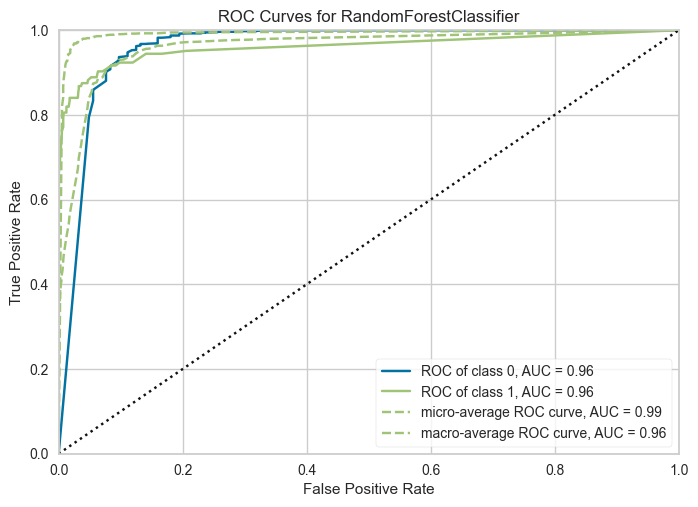

In [13]:
# functional API
plot_model(best, plot = 'auc')

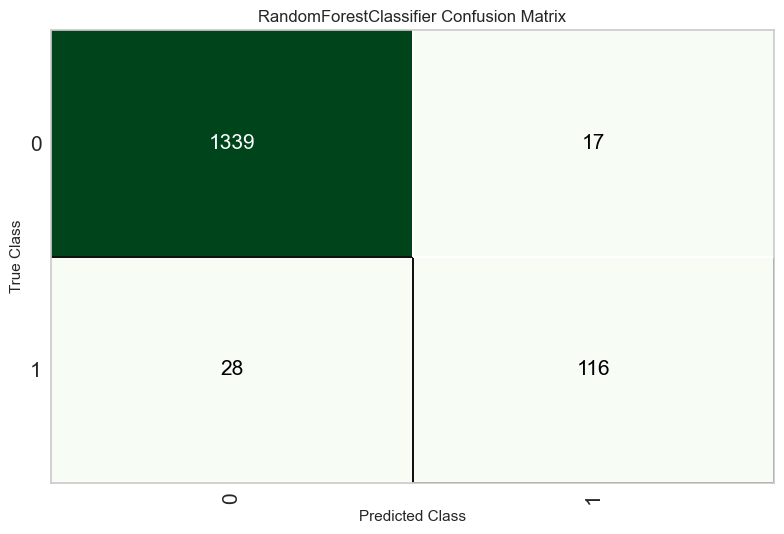

In [14]:
# functional API
plot_model(best, plot = 'confusion_matrix')

In [15]:
# functional API
predictions = predict_model(best, data=df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9896,0.9354,0.9635,0.9493,0.9440,0.9441


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Personal.Loan,prediction_label,prediction_score
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0,0,1.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0,0,1.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,1.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,1.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0,0,1.0


In [16]:
save_model(best, 'RandomForestClassifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Income', 'CCAvg', 'Mortgage'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Education', 'C...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion